In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_trees = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list[-1:])))

dout = 'gen_studies/no_pu/no_regressed'

signal_trees.extend(kwargs=lambda tree : dict(n_ext_jet=tree.n_jet-tree.nfound_presel))
signal_trees.extend(kwargs=eightb.reco_all)
signal_trees.extend(kwargs=eightb.reco_res_all)

[None]

In [3]:
jetlist = [
    f'gen_{h}{y}_{b}'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
    for b in ('b1','b2')
]

signal_trees.extend(
    kwargs=lambda t: {
        f'{jet}_reco_mask': (t[f'{jet}_recojet_pt'] > 0) 
        for jet in jetlist
    }
)

[None]

In [4]:
higgslist = [
    f'gen_{h}{y}'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
]

signal_trees.extend(
    kwargs=lambda t: {
        f'{higgs}_reco_mask': (t[f'{higgs}_b1_reco_mask']) & (t[f'{higgs}_b2_reco_mask'])
        for higgs in higgslist
    }
)


[None]

In [5]:
ylist = [
    f'gen_{y}'
    for y in ('Y1', 'Y2')
]

signal_trees.extend(
    kwargs=lambda t: {
        f'{y}_reco_mask': (t[f'{y.replace("gen_","gen_H1")}_reco_mask']) & (t[f'{y.replace("gen_","gen_H2")}_reco_mask'])
        for y in ylist
    }
)

[None]

In [6]:
signal_trees.extend(
    kwargs=lambda t: {
        f'gen_X_reco_mask': (t[f'gen_Y1_reco_mask']) & (t[f'gen_Y2_reco_mask'])
    }
)

[None]

In [7]:
signal_labels = [ re.findall('MX_\d+_MY_\d+',tree.filelist[0].fname)[0] for tree in signal_trees ]
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_labels))

tree = signal_trees[-2]

In [9]:
varinfo.n_jet = dict(bins=range(20), xlabel='N Jets')
varinfo.n_ext_jet = dict(bins=range(20), xlabel='N Combinatorics Jets')
varinfo.n_total_jet = dict(bins=range(20), xlabel='N Jets Total')
varinfo.nfound_all = dict(bins=range(10), xlabel='N Signal Jets Total')
varinfo.nfound_presel = dict(bins=range(
    10), xlabel='N Signal Jets')
varinfo.jet_pt = dict(bins=np.linspace(0, 500, 30), xlabel='Jet Pt (GeV)')
varinfo.jet_eta = dict(bins=np.linspace(-4, 4, 30), xlabel='Jet Eta')


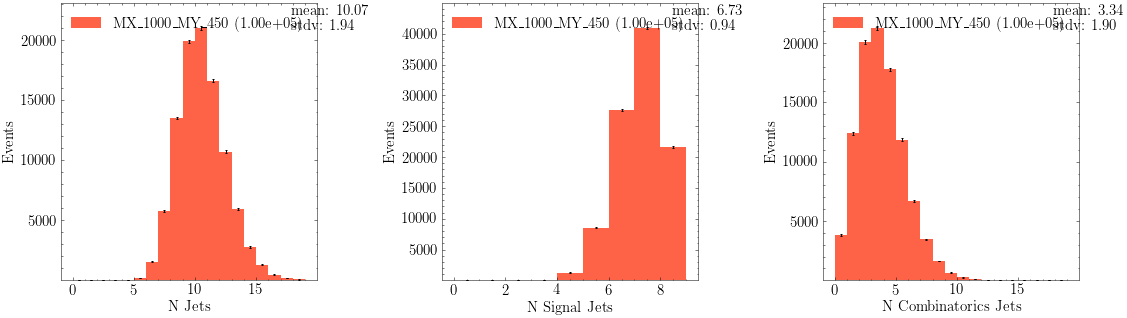

In [10]:
study.quick([tree], varlist=['n_jet', 'nfound_presel','n_ext_jet'],dim=(-1,3),scale=False,saveas=f'{dout}/n_reco_jets',stats=True)

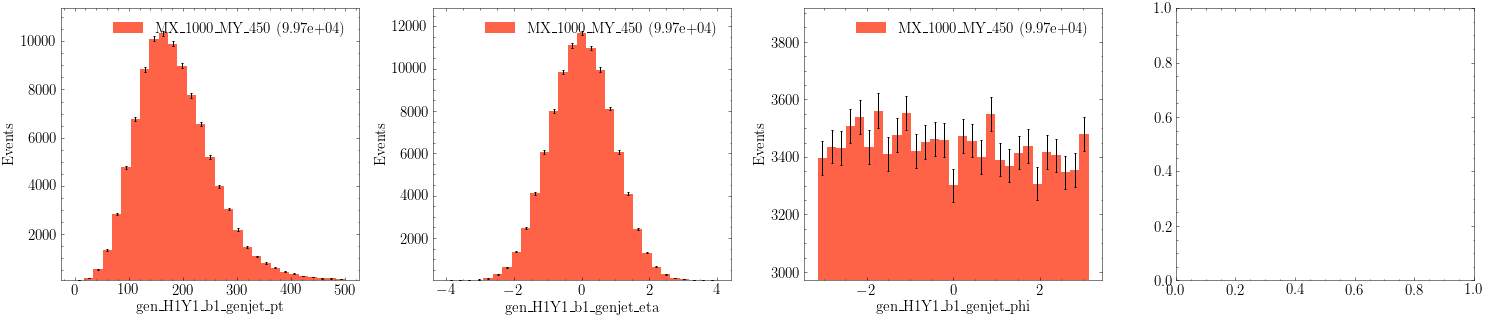

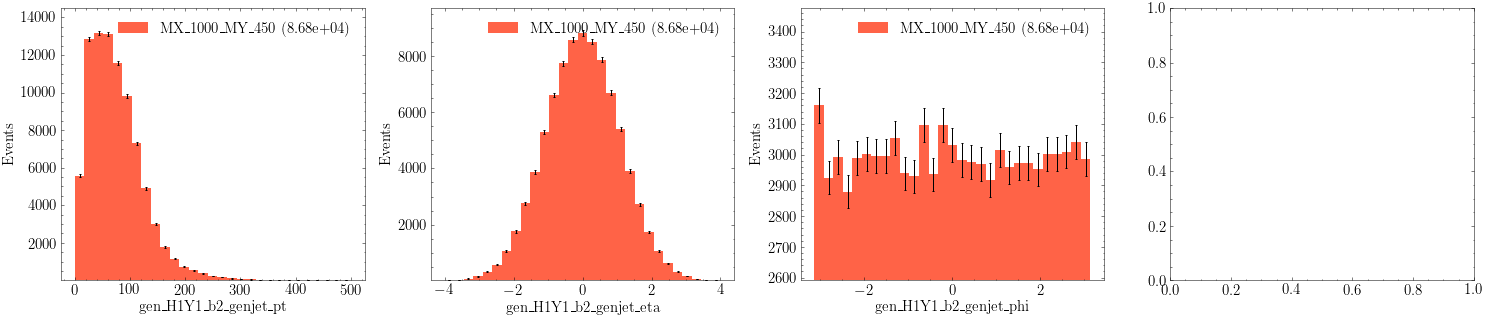

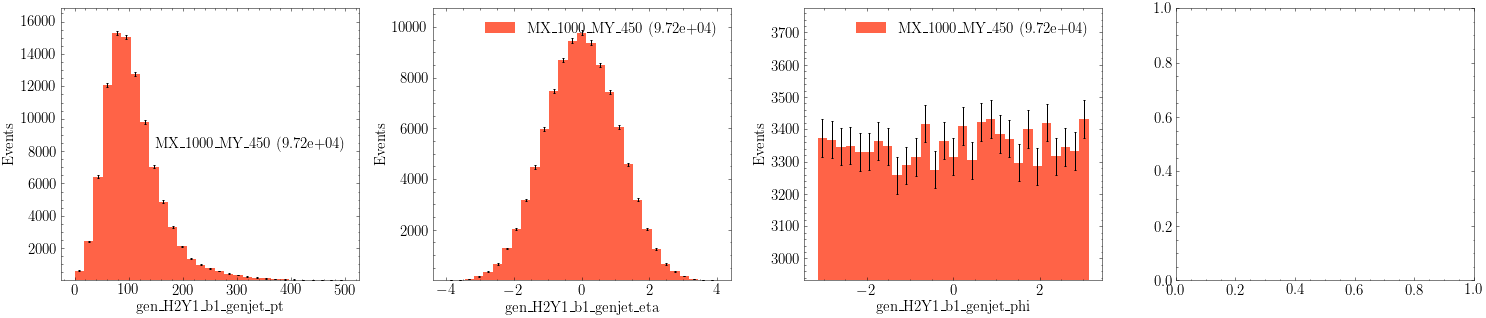

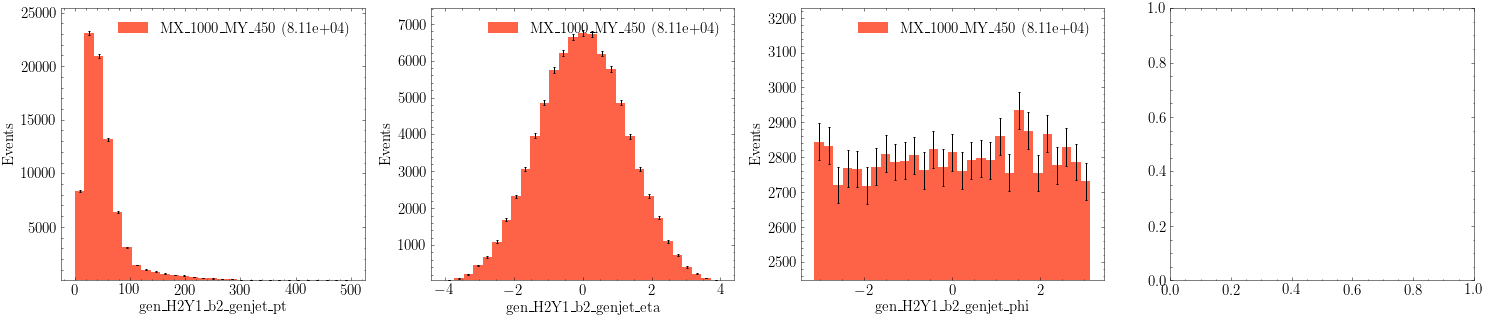

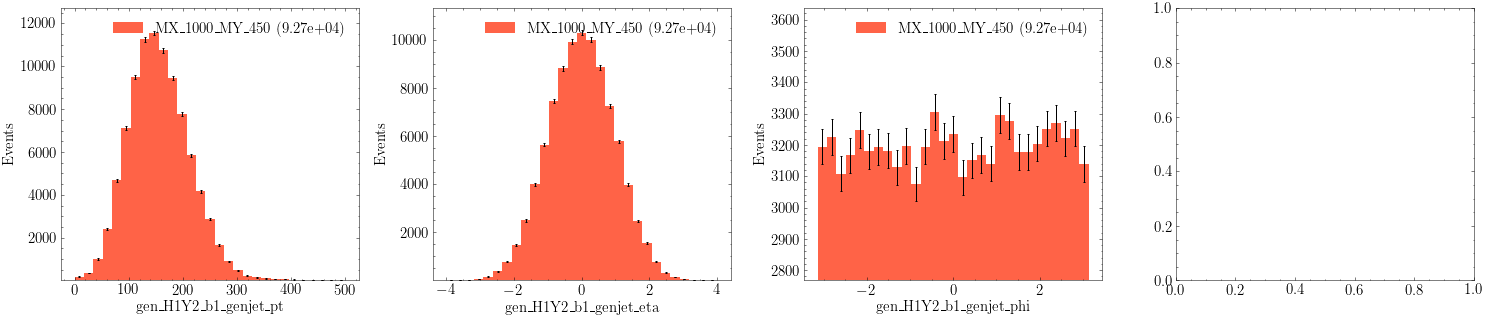

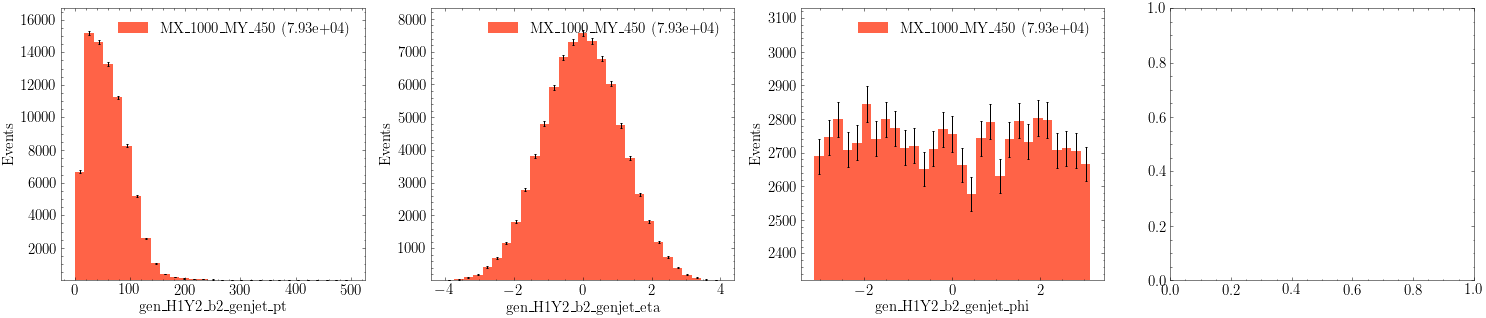

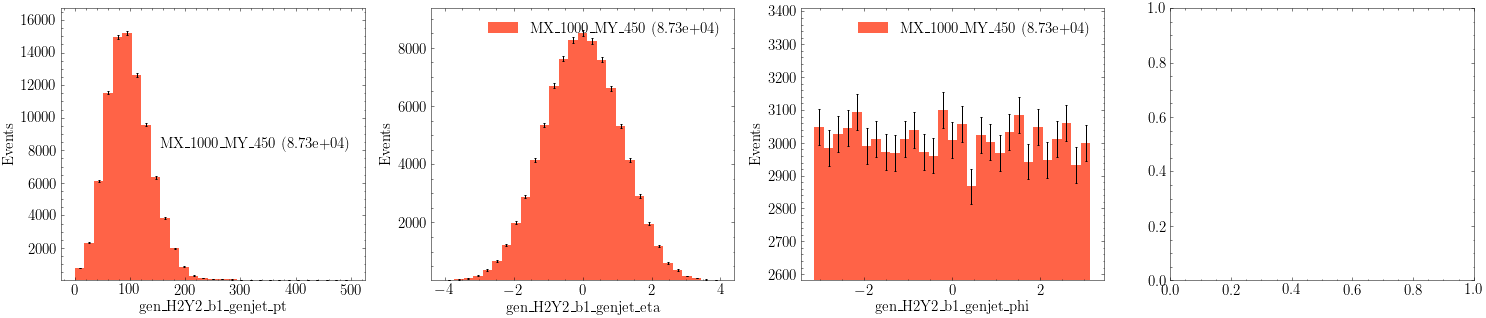

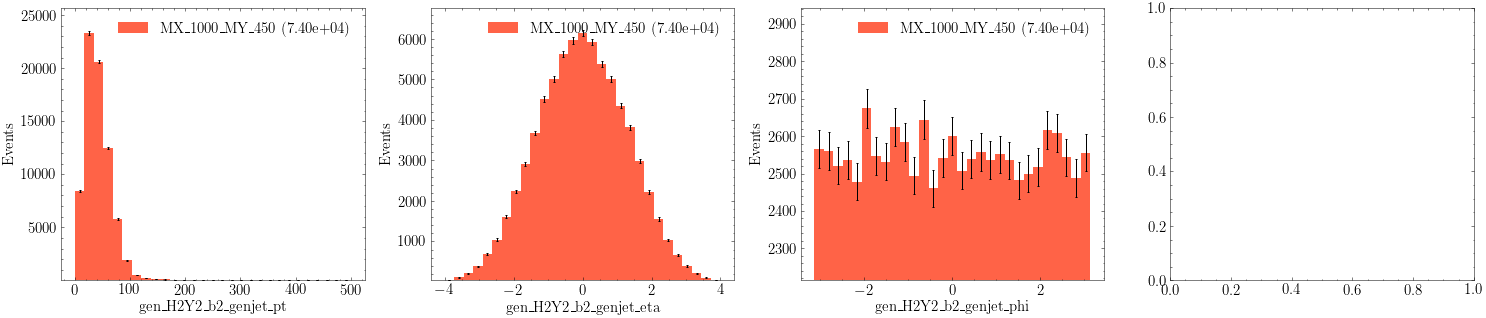

In [12]:
jetlist = [
    f'gen_{h}{y}_{b}_genjet'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
    for b in ('b1', 'b2')
]

for jet in jetlist:
    varlist = [f'{jet}_{v}' for v in ('pt', 'eta', 'phi',)]
    masks = [ tree[varlist[0]] > 0 for tree in signal_trees ]
    study.quick([tree], masks=masks[-1:],
                varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/{jet}')
    


In [ ]:
jetlist = [
    f'gen_{h}{y}_{b}_recojet'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
    for b in ('b1', 'b2')
]

for jet in jetlist:
    varlist = [f'{jet}_{v}' for v in ('pt', 'eta', 'phi', 'btag')]
    masks = [ tree[varlist[0]] > 0 for tree in signal_trees ]
    study.quick([tree], masks=masks[-1:],
                varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/{jet}')
    study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/{jet}')


In [ ]:
higgslist = [
    f'gen_{h}{y}'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
]
binlist = [np.linspace(0, 500, 30), np.linspace(-4, 4, 30), np.linspace(-3.14, 3.14, 30), np.linspace(0, 250, 30)]
for higgs in higgslist:
    varlist = [f'{higgs}_{v}' for v in ('pt', 'eta', 'phi', 'm')]
    masks = [ tree[varlist[0]] > 0 for tree in signal_trees ]
    study.quick([tree], masks=masks[-1:],
                varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/{higgs}')
    study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/{higgs}')


In [ ]:
higgslist = [
    f'gen_{h}{y}_reco'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
]
binlist = [np.linspace(0, 500, 30), np.linspace(-4, 4, 30), np.linspace(-3.14, 3.14, 30), np.linspace(0, 250, 30)]
for higgs in higgslist:
    varlist = [f'{higgs}_{v}' for v in ('pt', 'eta', 'phi', 'm')]
    masks = getattr(signal_trees,f'{higgs}_mask')
    study.quick([tree], masks=masks[-1:],
                varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/{higgs}')
    study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/{higgs}')
    


In [ ]:
ylist = [
    f'gen_{y}'
    for y in ('Y1', 'Y2')
]
binlist = [np.linspace(0, 500, 30), np.linspace(-4, 4, 30), np.linspace(-3.14, 3.14, 30), np.linspace(0, 600, 30)]
for y in ylist:
    varlist = [f'{y}_{v}' for v in ('pt', 'eta', 'phi', 'm')]
    masks = [ tree[varlist[0]] > 0 for tree in signal_trees ]
    study.quick([tree], masks=masks[-1:],
                varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/{y}')
    study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/{y}')


In [ ]:
ylist = [
    f'gen_{y}_reco'
    for y in ('Y1', 'Y2')
]
binlist = [np.linspace(0, 500, 30), np.linspace(-4, 4, 30), np.linspace(-3.14, 3.14, 30), np.linspace(0, 600, 30)]
for y in ylist:
    varlist = [f'{y}_{v}' for v in ('pt', 'eta', 'phi', 'm')]
    masks = getattr(signal_trees,f'{y}_mask')
    study.quick([tree], masks=masks[-1:],
                varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/{y}')
    study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/{y}')


In [ ]:
varlist = [f'gen_X_{v}' for v in ('pt', 'eta', 'phi', 'm')]
binlist = [np.linspace(0, 500, 30), np.linspace(-4, 4, 30), np.linspace(-3.14, 3.14, 30), np.linspace(0, 1400, 30)]
masks = [ tree[varlist[0]] > 0 for tree in signal_trees ]
study.quick([tree], masks=masks[-1:],
            varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/gen_X')
study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/gen_X')


In [ ]:
varlist = [f'gen_X_reco_{v}' for v in ('pt', 'eta', 'phi', 'm')]

jetlist = [
    f'gen_{h}{y}_{b}_recojet'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
    for b in ('b1', 'b2')
]
masks = signal_trees.gen_X_reco_mask
binlist = [np.linspace(0, 1000, 30), np.linspace(-4, 4, 30), np.linspace(-3.14, 3.14, 30), np.linspace(0, 1400, 30)]
study.quick([tree], masks=masks[-1:],
            varlist=varlist, dim=(-1, 4), xlabels=varlist,scale=False,saveas=f'{dout}/gen_X_reco')
study.boxplot(signal_trees,masks=masks, varlist=varlist,dim=(-1,4),scale=False,labels=signal_points,s_colors=[None],saveas=f'{dout}/boxplot/gen_X_reco')


In [ ]:
def resolution(reco,gen):
    res = reco/gen
    return res

res_bins = np.linspace(0,2,30)

In [ ]:
jetlist = [
    f'gen_{h}{y}_{b}'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
    for b in ('b1', 'b2')
]

for jet in jetlist:
    varlist = [f'{jet}_{v}_res' for v in ('pt', 'eta', 'phi',)]
    masks = [ tree[f'{jet}_recojet_pt'] > 0 for tree in signal_trees ]
    study.quick([tree], masks=masks[-1:],varlist=varlist, dim=(-1, 4), xlabels=varlist, scale=False, binlist=[res_bins]*3, stats_restricted=True, saveas=f'{dout}/{jet}_res')
    study.boxplot(signal_trees, masks=masks,varlist=varlist, dim=(-1, 4), xlabels=varlist, scale=False, binlist=[res_bins]*3, labels=signal_points, saveas=f'{dout}/boxplot/{jet}_res')
    


In [ ]:
higgslist = [
    f'gen_{h}{y}'
    for y in ('Y1', 'Y2')
    for h in ('H1', 'H2')
]

for higgs in higgslist:
    varlist = [f'{higgs}_{v}_res' for v in ('pt', 'eta', 'phi', 'm')]
    masks = getattr(signal_trees,f'{higgs}_reco_mask')
    study.quick([tree], masks=masks[-1:], varlist=varlist, dim=(-1, 4), xlabels=varlist,binlist=[res_bins]*4,scale=False,stats_restricted=True,saveas=f'{dout}/{higgs}_res')
    study.boxplot(signal_trees, masks=masks,varlist=varlist, dim=(-1, 4), xlabels=varlist, scale=False, binlist=[res_bins]*4, labels=signal_points,saveas=f'{dout}/boxplot/{higgs}_res')


In [ ]:
ylist = [
    f'gen_{y}'
    for y in ('Y1', 'Y2')
]

for y in ylist:
    varlist = [f'{y}_{v}_res' for v in ('pt', 'eta', 'phi', 'm')]
    masks = getattr(signal_trees,f'{y}_reco_mask')
    study.quick([tree], masks=masks[-1:], varlist=varlist, dim=(-1, 4), xlabels=varlist, binlist=[res_bins]*4,scale=False,stats_restricted=True,saveas=f'{dout}/{y}_res')
    study.boxplot(signal_trees, masks=masks,varlist=varlist, dim=(-1, 4), xlabels=varlist, scale=False, binlist=[res_bins]*4, labels=signal_points,saveas=f'{dout}/boxplot/{y}_res')
    

In [ ]:
tree = signal_trees[0]
varlist = [f'gen_X_{v}_res' for v in ('pt', 'eta', 'phi', 'm')]

masks = getattr(signal_trees,f'gen_X_reco_mask')
study.quick([tree], masks=masks[-1:], varlist=varlist, dim=(-1, 4), xlabels=varlist, binlist=[res_bins]*4,scale=False,stats_restricted=True,saveas=f'{dout}/gen_X_res')
study.boxplot(signal_trees, masks=masks,varlist=varlist, dim=(-1, 4), xlabels=varlist, scale=False, binlist=[res_bins]*4, labels=signal_points,saveas=f'{dout}/boxplot/gen_X_res')